In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sympy import *
init_printing()
import sys
sys.path.append('../')
import uPVT.PVT_correlations as PVT

## Объемный коэффициент нефти

### Корреляция при давлении выше давления насыщения

Корреляция для объемного коэффициента нефти при давлении выше давления насыщения в некоторых источниках указывается, что она принадлежит Стендингу, в некоторых Vasquez & Beggs. На самом деле это не корреляция, так как природа ее происхождения не статистическая, а вполне себе физическое уравнение.

$$ b_o = b_{ob} \cdot \exp(c_o(p_b - p)) $$

где:

$ b_o $ - объемный коэффициент нефти при давлении p, м3/м3

$ b_{ob} $ - объемный коэффициент нефти при давлении насыщения, м3/м3

$ c_o $ - сжимаемость нефти, 1/МПа

$ p $ - давление, МПа

$ p_b $ - давление насыщения, МПа



In [2]:
# Уравнение для объемного коэффициента нефти реализовано
# в виде функции unf_fvf_VB_m3m3_above в модуле PVT_correlations. 
# Подробные данные по функции включая исходный код приведены ниже

PVT.unf_fvf_VB_m3m3_above??

In [3]:
# параметры определяющие диапазоны значений для построения графиков
p_set=np.arange(8,11,0.25)
co_set=np.arange(1 * 10 ** (-3),4 * 10 ** (-3),10 ** (-3))
bob = 1.2
pb = 8
# функция для автоматизации построения графиков по давлению насыщения
def prep_plot(func,p_set,co_set,pb,bob,plot_title,plot_xlab,plot_ylab):
    for co in co_set:
        b_o_set=[]
        for p in p_set:
            b_o_set.append(func(bob,co,pb,p))
        plt.plot(p_set, b_o_set, label='co ={}'.format(co))
    plt.title(plot_title)
    plt.ylabel(plot_ylab, color = 'black')
    plt.xlabel(plot_xlab, color = 'black')
    plt.legend()

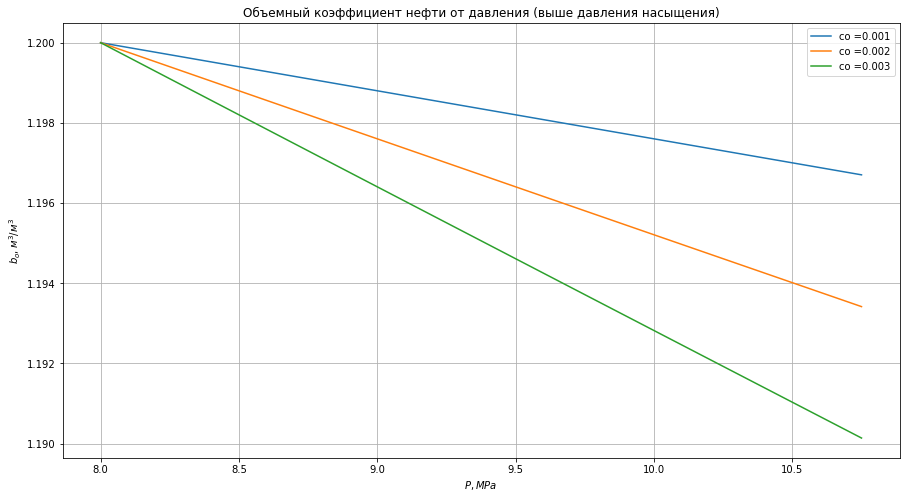

In [4]:
# код для построения графиков
plt.figure(figsize=(15,8))
f = PVT.unf_fvf_VB_m3m3_above
prep_plot(f,p_set,co_set,pb,bob,
              'Объемный коэффициент нефти от давления (выше давления насыщения)',
               '$P, MPa$',
               '$b_o, м^3/м^3$')

# рисуем все
plt.grid()
plt.show()

### Корреляция Маккейна при давлении меньше или равном давлению насыщения

Уравнение выводится из материального баланса и не является корреляцией.

$$ b_o = \left( \frac{ \rho_{STO} + 0.01357 R_s \gamma_g}{\rho_{or}}\right) $$

где:

$ b_o $ - объемный коэффициент нефти при давлении p, м3/м3

$ \rho_{STO} $ - плотность дегазированной нефти, фунт/фт3 (кг/м3)

$ R_s $ - газосодержание при давлении p, фт3/баррель (м3/м3)

$ \gamma_g $ - плотность газа относительно воздуха

$ \rho_{or} $ - плотность пластовой нефти, фунт/фт3 (кг/м3)

#### Внутри функции уже реализован перевод величин, единицы измерения в скобках - входные параметры в функцию

In [5]:
# Уравнение для объемного коэффициента нефти реализовано
# в виде функции unf_fvf_Mccain_m3m3_below в модуле PVT_correlations. 
# Подробные данные по функции включая исходный код приведены ниже

PVT.unf_fvf_Mccain_m3m3_below??

In [6]:
# параметры определяющие диапазоны значений для построения графиков
rs_set=np.arange(0,300,25)
rho_set=np.arange(600,850,50)
rho_sto = 800
gamma_gas = 0.8
# функция для автоматизации построения графиков по давлению насыщения
def prep_plot(func,rs_set,rho_set,gamma_gas,rho_sto,plot_title,plot_xlab,plot_ylab):
    for rho in rho_set:
        b_o_set=[]
        for rs in rs_set:
            b_o_set.append(func(rho_sto,rs,rho,gamma_gas))
        plt.plot(rs_set, b_o_set, label='rho ={}'.format(rho))
    plt.title(plot_title)
    plt.ylabel(plot_ylab, color = 'black')
    plt.xlabel(plot_xlab, color = 'black')
    plt.legend()

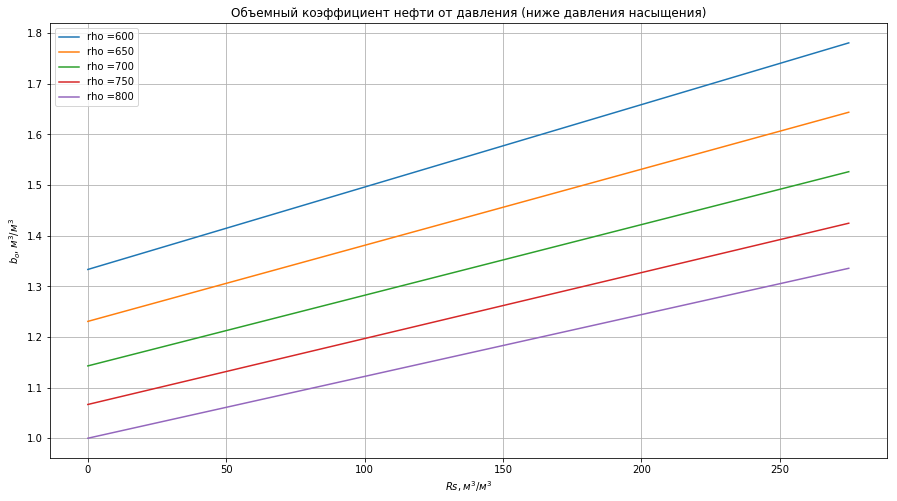

In [7]:
# код для построения графиков
plt.figure(figsize=(15,8))
f = PVT.unf_fvf_Mccain_m3m3_below
prep_plot(f,rs_set,rho_set,gamma_gas,rho_sto,
              'Объемный коэффициент нефти от давления (ниже давления насыщения)',
               '$Rs, м^3/м^3$',
               '$b_o, м^3/м^3$')

# рисуем все
plt.grid()
plt.show()

Этот график вообще говоря неверный,он построен для понимания, потому что при разном Rs будет разная плотность и график будет нелинейным.